# Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image
from numpy import asarray
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Import Dataset - Crowd counting

## UCSD Dataset

UCSD dataset consists of an hour of video with 2000 annotated frames and in a total of 49,885 pedestrian
instances, which was captured from a pedestrian walkway of the UCSD campus by a stationary camera. The original video was recorded at 30fps with a frame size of 480 × 740 and later downsampled to 10fps with dimension 158×238. The 601-1400 frames were used for training and the remaining 1200 frames for testing. 
The ROI of the walkway and the traveling direction are
also provided.

It is taken from http://www.svcl.ucsd.edu/projects/peoplecnt/

In [25]:
def load_dataset(path):
    
    lista_images=[]
    
    # Append images to a list
    for item in os.listdir(path):
        if os.path.isfile(path+item):
            im = Image.open(path+item).convert("RGB")
            im = np.array(im)
            lista_images.append(im)
            
    return np.array(lista_images)

In [26]:
dataset_UCSD0 = load_dataset('UCSDpeds/ucsdpeds/vidf/vidf1_33_000.y/')
dataset_UCSD0

array([[[[104, 104, 104],
         [107, 107, 107],
         [ 87,  87,  87],
         ...,
         [ 41,  41,  41],
         [ 44,  44,  44],
         [ 48,  48,  48]],

        [[ 76,  76,  76],
         [ 73,  73,  73],
         [ 79,  79,  79],
         ...,
         [ 43,  43,  43],
         [ 55,  55,  55],
         [ 66,  66,  66]],

        [[ 83,  83,  83],
         [ 83,  83,  83],
         [ 88,  88,  88],
         ...,
         [ 49,  49,  49],
         [ 35,  35,  35],
         [ 64,  64,  64]],

        ...,

        [[ 84,  84,  84],
         [ 84,  84,  84],
         [ 84,  84,  84],
         ...,
         [166, 166, 166],
         [164, 164, 164],
         [183, 183, 183]],

        [[ 79,  79,  79],
         [ 83,  83,  83],
         [ 87,  87,  87],
         ...,
         [166, 166, 166],
         [163, 163, 163],
         [183, 183, 183]],

        [[ 76,  76,  76],
         [ 79,  79,  79],
         [ 82,  82,  82],
         ...,
         [167, 167, 167],
        

In [27]:
# Convert and save the list of images in '.npy' format
np.save("vidf1_33_000.npy",dataset_UCSD0)

In [28]:
dataset = np.load("vidf1_33_000.npy")

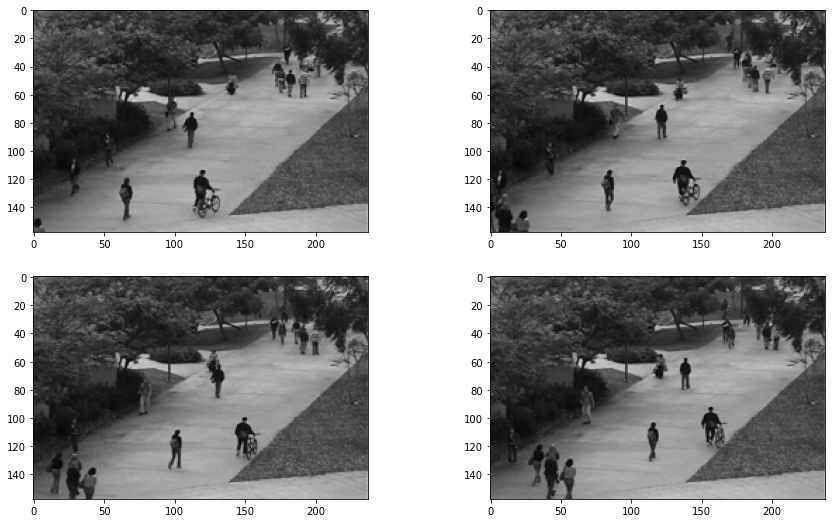

In [29]:
# lest's display 4 images

f, ax = plt.subplots(2,2, figsize = (15, 9))

ax[0,0].imshow(dataset[0])
ax[0,1].imshow(dataset[15])
ax[1,0].imshow(dataset[30])
ax[1,1].imshow(dataset[45])


In [21]:
# 2000 rows with the id and the count (number of person in that image id)

labels = pd.read_csv('labels.csv')

In [43]:
count = labels['count']

## Mall Dataset

Mall dataset was captured by a public surveillance camera in a shopping mall, which contains more challenging lighting conditions and more severe perspective distortion than the UCSD dataset. 
The dataset is composed by RGB images of frames in a video (as inputs) and the object counting on every frame, this is the number of pedestrians (object) in the image. The images are 480x640 pixels at 3 channels of the same spot recorded by a webcam in a mall but it has different number of person on every frame, is a problem of crowd counting.

It is taken from https://www.kaggle.com/datasets/fmena14/crowd-counting?resource=download&select=labels.csv

In [5]:
# 2000 RGB images of 480x640 pixels

dataset = np.load("Mall_dataset/images.npy")

In [6]:
dataset.shape

(2000, 480, 640, 3)

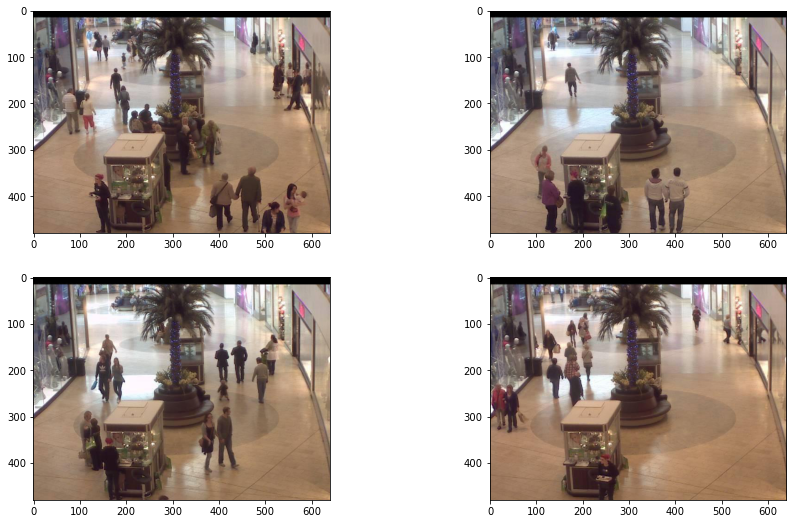

In [65]:
# lest's display 4 images

f, ax = plt.subplots(2,2, figsize = (15, 9))

ax[0,0].imshow(dataset[0])
ax[0,1].imshow(dataset[15])
ax[1,0].imshow(dataset[30])
ax[1,1].imshow(dataset[45])


In [21]:
# 2000 rows with the id and the count (number of person in that image id)

labels = pd.read_csv('labels.csv')

In [43]:
count = labels['count']

## Fudan-ShanghaiTech Dataset

Fudan-ShanghaiTech is a large-scale video crowd counting dataset that has been introduced because existing video crowd counting datasets were too small in terms of number of both frames as well as scenes.

It contains 100 videos captured from 13 different scenes. FDST includes 150,000 frames and 394,081 annotated heads. The training set of the FDST dataset consists of 60 videos, 9000 frames, and the testing set contains the remaining 40 videos, 6000 frames. The number of frames per second (FPS) for FDST is 30.

It is taken from https://github.com/sweetyy83/Lstn_fdst_dataset

In [30]:
def load_dataset_jpg(path):
    
    lista_images=[]
    
    # Append images to a list
    for item in os.listdir(path):
        if os.path.isfile(path+item) & (item.endswith(".jpg")):
            im = Image.open(path+item).convert("RGB")
            im = np.array(im)
            lista_images.append(im)
            
    return np.array(lista_images)

In [31]:
train_FDST1 = load_dataset_jpg('train_data_FDST/train_data/1/')
train_FDST1

array([[[[248, 252, 229],
         [228, 231, 210],
         [174, 177, 160],
         ...,
         [157, 163, 163],
         [160, 166, 162],
         [153, 160, 153]],

        [[246, 250, 227],
         [233, 236, 215],
         [186, 189, 172],
         ...,
         [156, 162, 162],
         [160, 166, 162],
         [153, 160, 153]],

        [[244, 248, 225],
         [240, 243, 222],
         [204, 207, 190],
         ...,
         [156, 162, 162],
         [159, 165, 161],
         [155, 162, 155]],

        ...,

        [[ 29,  22,  16],
         [ 29,  22,  16],
         [ 29,  22,  16],
         ...,
         [142, 124, 104],
         [142, 124, 104],
         [142, 124, 104]],

        [[ 29,  22,  16],
         [ 29,  22,  16],
         [ 29,  22,  16],
         ...,
         [142, 124, 104],
         [142, 124, 104],
         [142, 124, 104]],

        [[ 29,  22,  16],
         [ 29,  22,  16],
         [ 29,  22,  16],
         ...,
         [142, 124, 104],
        

In [32]:
# Convert and save the list of images in '.npy' format
np.save("train_FDST1.npy",train_FDST1)

In [33]:
dataset = np.load("train_FDST1.npy")

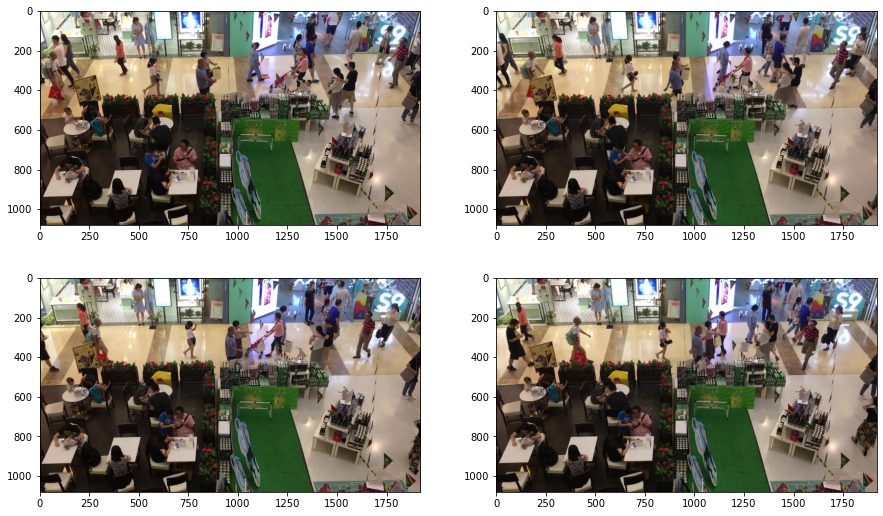

In [34]:
# lest's display 4 images

f, ax = plt.subplots(2,2, figsize = (15, 9))

ax[0,0].imshow(dataset[0])
ax[0,1].imshow(dataset[15])
ax[1,0].imshow(dataset[30])
ax[1,1].imshow(dataset[45])


In [21]:
# 2000 rows with the id and the count (number of person in that image id)

labels = pd.read_csv('labels.csv')

In [43]:
count = labels['count']

# Distribution of the count

## Mall Dataset

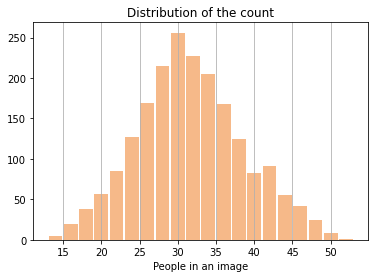

In [41]:
# histogram of the numer of person for each image

count.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#f4a261', alpha=0.75)

plt.title('Distribution of the count - Mall Dataset')
plt.xlabel('People in an image')
plt.ylabel('')
plt.grid(axis='y', alpha=0.35)

In [42]:
# let's see the mean, median and quantiles

count.describe()

count    2000.000000
mean       31.157500
std         6.945417
min        13.000000
25%        26.000000
50%        31.000000
75%        36.000000
max        53.000000
Name: count, dtype: float64

# VGG 16 model

In [ ]:
# Import VGG16
vgg16_model = VGG16(weights='imagenet', input_shape=(112*2,112*2,3) ,include_top=False, pooling=False)

